# Iris Data Analysis

## Table of Contents

- [Background](#Background)
- [Summary](#Summary)
- [Importing the data](#Importing-the-data)
- [Histogram](#Histogram)
- [Scatterplot](#Scatterplot)
- [Additional analysis](#Additional-analysis)

![Iris](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)

_Iris setosa_ flower (image available from [Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa) with image having a public domain licence. 

## Background 

The Iris dataset is a small dataset that is commonly used by beginners within machine learning to learn about classification algorithms. This dataset is one of the widley used in machine learning and was published by R.A. Fisher (statistican) in 1936 with Edgar Anderson collecting the raw data ([Unwin and Kleinman, 2021](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/1740-9713.01589)). The data was origionally published in 1936 by R. A. Fisher for the purposes of applying to a newly created technique by Fisher called linear discriminant function (also known as linear discriminant analysis ([Unwin and Kleinman, 2021](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/1740-9713.01589); [Fisher, 1936](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x)).

There are 150 observations comprising of four numerical variables and one class label. The numerical variables (all in cm) are petal length, petal width, sepal length, and sepal width while the class column consists of three flowers of the _Iris_ genus with 50 observations each; _Iris setosa_, _Iris versicolor_, and _Iris virginica_. As each class of Iris flower has 50 observations each, this is a balanced dataset and makes it quite suitable for learning about machine learning techniques such as the decision tree, K-means clustering or SVM (support vector machines) classification algorithm ([Ye et al., 2023](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10456161)).

The dataset housed within UCI contains three well known errors. This error arises within python as the python module Skikit-Learn contains these errors from UCI. However, the R module MASS does not contain these errors. The data from [Fisher, 1936](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) is presented below with the correct data and a code snippit showing the current data within these locations (refer to [Importing the data](#Importing-the-data) section). Refer to the Scikit-Learn issue [#10550](https://github.com/scikit-learn/scikit-learn/issues/10550) for further discussion. 

Both the 35th and 38th rows contain errors. For for 35 (index 34) the pedal width is 0.1 cm when it should be 0.2 cm. For row 38 (index 37) sepal width is 3.1 cm when it should be 3.6 and petal width is 1.5 cm when it should be 1.4 cm. These can be updated using the loc functionaliy of python to edit at the index (as python uses zero indexing, the row index is one less of the row (n-1)). 

This manipulation can be avoided by using the _bezdekiris.data_ file from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris) as this file is the _iris.data_ file with these corrections applied (refer to this [difference checker](https://www.diffchecker.com/8ECzdWTY/) of the _iris.data_ and _bezdekiris.data_ files).  

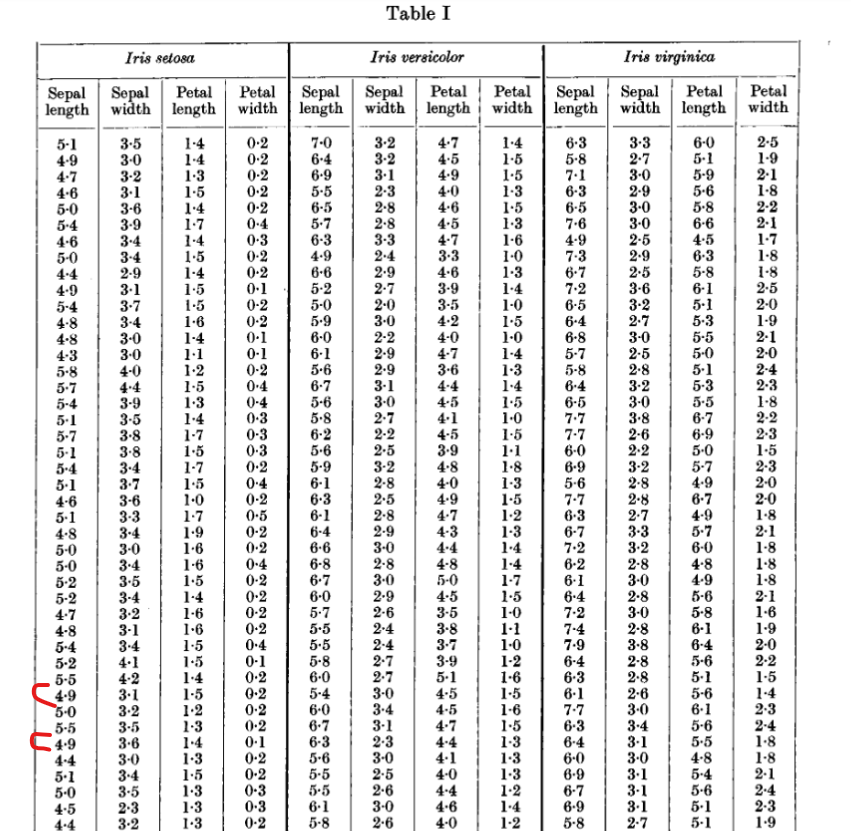

## Importing the data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris), a collection of datasets used in machine learning. 

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels

In [66]:
# creating a column name list to supply tto the names argument of the pd.read_csv() function. 
column_names = ["sepal_length","sepal_width","petal_length","petal_width","species"]

iris_data = pd.read_csv('iris.data',header=None,names=column_names)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For plotting purposes, the genus _Iris_ can be removed from the species column to leave only the three species of _Iris_ flower; _setosa_, _versicolor_, and _virginica_

In [67]:
iris_data["species"]= iris_data["species"].str.split("-").str[1]

# reviewing that this sring split was successful at spliting the data at the hyphen and keeping the data to the right hand 
# side of the hyphen using the .str[1] function. 
iris_data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [68]:
iris_data.loc[34]

sepal_length       4.9
sepal_width        3.1
petal_length       1.5
petal_width        0.1
species         setosa
Name: 34, dtype: object

In [69]:
iris_data.at[34,'petal_width']= 0.2

In [70]:
iris_data.loc[34]

sepal_length       4.9
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 34, dtype: object

In [71]:
iris_data.loc[37]

sepal_length       4.9
sepal_width        3.1
petal_length       1.5
petal_width        0.1
species         setosa
Name: 37, dtype: object

In [72]:
iris_data.at[37,'sepal_width']= 3.6
iris_data.at[37,'petal_length']= 1.4

In [73]:
iris_data.loc[37]

sepal_length       4.9
sepal_width        3.6
petal_length       1.4
petal_width        0.1
species         setosa
Name: 37, dtype: object

## Summary

Using the _.describe()_ function a numerical output of each of the four variables is saved to _summary.txt_. This function shows the count, mean, standard deviation, minimum (0 perentile), 25<sup>th</sup> percentile, 50<sup>th</sup> percentile (the median), 75<sup>th</sup> percentile and maximum (100<sup>th</sup> percentile) of the data. 

The mean and median values of sepal length, sepal width and petal width are close together and this would indicate normally distributed data which will be further explored within the [Histogram](#Histogram) section below. The median and mean value of petal length differ considerably so there would be an expected departure from normality. 

In [74]:
# Returning summary statistics to two decimal places by using a lambda function
summary = iris_data.describe().applymap(lambda x: f"{x:0.2f}")
summary

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [75]:
summary.to_csv('summary.txt', header=True, index=True, sep=' ', mode='w')

## Histogram 

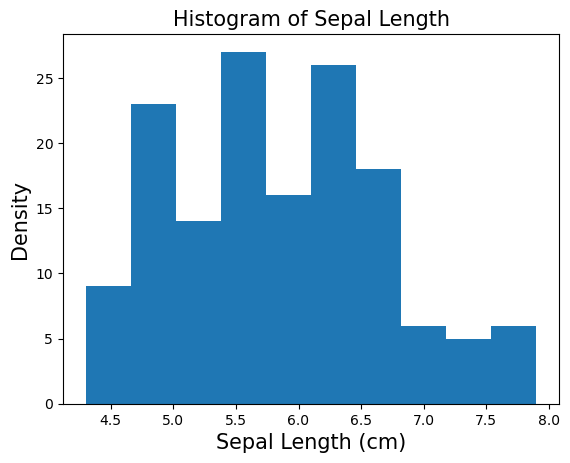

In [76]:
# sepal length 
plt.hist(iris_data['sepal_length'],bins=10)
plt.title("Histogram of Sepal Length", size=15)
plt.xlabel("Sepal Length (cm)", size=15)
plt.ylabel("Density", size=15)
plt.savefig('histogram_sepallength.png');

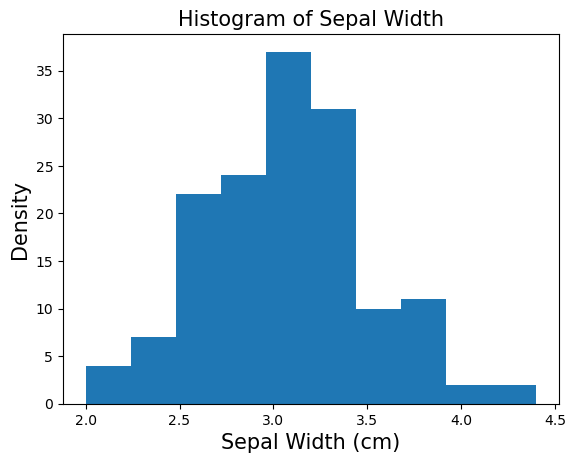

In [77]:
# sepal width 
plt.hist(iris_data['sepal_width'],bins=10)
plt.title("Histogram of Sepal Width", size=15)
plt.xlabel("Sepal Width (cm)", size=15)
plt.ylabel("Density", size=15)
plt.savefig('histogram_sepalwidth.png');

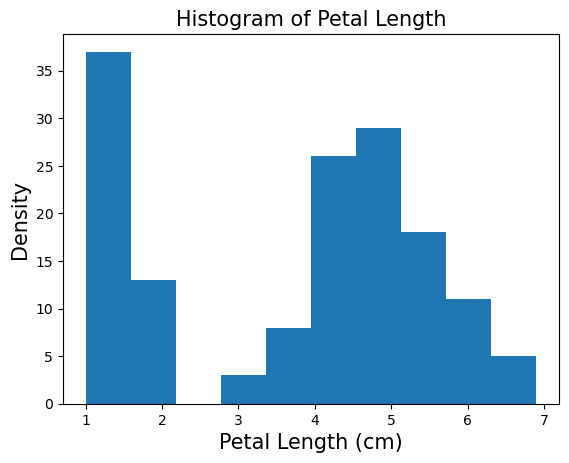

In [78]:
# petal length
plt.hist(iris_data['petal_length'],bins=10)
plt.title("Histogram of Petal Length", size=15)
plt.xlabel("Petal Length (cm)", size=15)
plt.ylabel("Density", size=15)
plt.savefig('histogram_petallength.png');

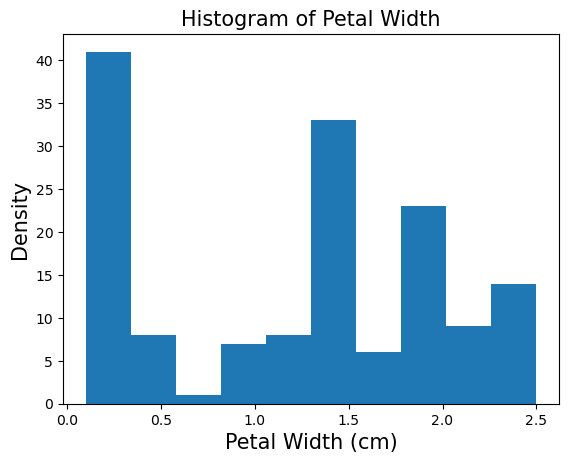

In [79]:
# petal width
plt.hist(iris_data['petal_width'],bins=10)
plt.title("Histogram of Petal Width", size=15)
plt.xlabel("Petal Width (cm)", size=15)
plt.ylabel("Density", size=15)
plt.savefig('histogram_petalwidth.png');

Saved PNG files of each of the histograms show that the data is generally normally distributed, however petal width does not look normally distributed even though the median and mean values of petal with are similar. This could be due the small number of observations or each of the three species of flower having a different petal width. As shown by the above descriptive statistics, petal width is not normally distributed and appears to be bimodel (having two distributions). 

## Scatterplot

C:\Users\Ellen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



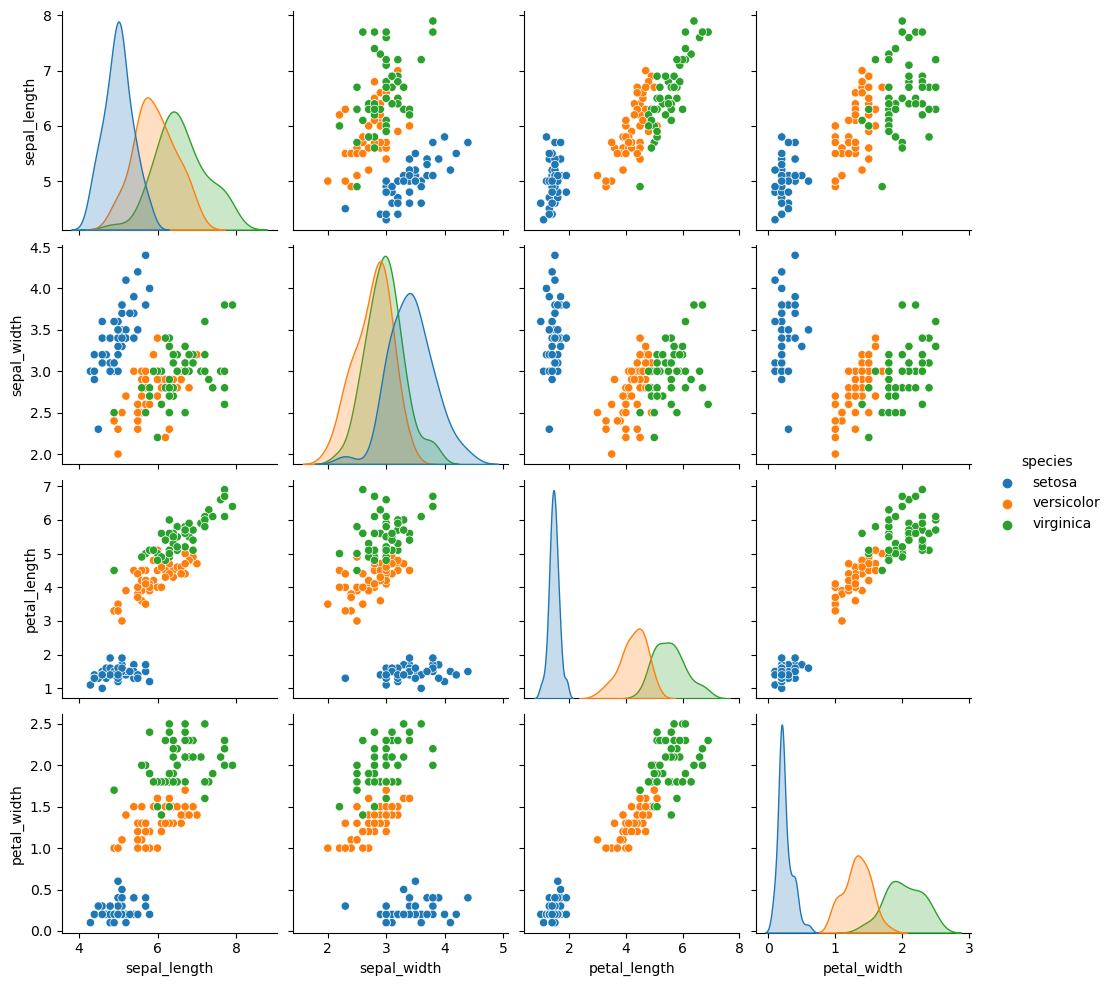

In [80]:
sns.pairplot(iris_data, hue='species',kind='scatter'); 

Scatter plots of all the pairs of variables delimited by species shows that there are some positive strong correlations such as with petal length and petal widh, petal length and sepal width, and sepal length and sepal width. The diagonal box of the pairplot shows a histogram of each species and from the above singple histogram in the [Histogram](#Histogram) section a bimodel distribuion was expected to be present. Viewing the histogram of the pairplot of petal width this appears to be the case with _Iris setosa_ having smaller petal lengths. Petal length has a similar distribution with _Iris setosa_ having smaller petal lengths. For both petal length and petal width there is an overlap between _Iris virginica_ and _Iris vericolor_ with more of an overlap of values occuring for petal length. This would help to explain why there was closeness with the median and mean values. However, the closeness of the median and mean values for petal length was not as good as for sepal length and sepal width which can be seen with the histogram of the pairplot. 

## Additional analysis 

Additional analysis in the form of a correlation plot was performed on the numerical data with a strong positive correlation seen for petal length and petal width (_r_ value of 0.96). Similarly a strong correlation was seen with petal width and sepal length (_r_ value of 0.82) and with petal length and sepal length (_r_ value of 0.87). These correlations between variables could be used to develop a simple linear regression model (_y = mX + C_) between two of the variables. 

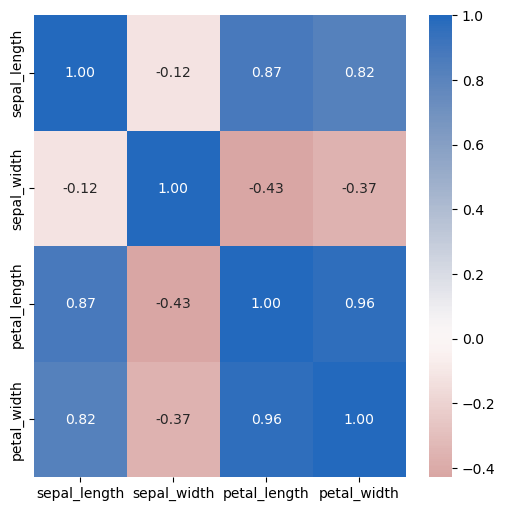

In [81]:
iris_num_data = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]
plt.figure(figsize = [6, 6])
sns.heatmap(iris_num_data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Aggregating the mean, standard deviatio, and median by species is means that it is easier to view the side by side comparision rather than using the table presented within the [Summary](#Summary) section. Visually the differences within the median value for sepal length for the three species of _Iris_ flower can be viewed using a boxplot which shows the median value, some percentiles and any outlier values. There appears to be one outlier value for _Iris virginica_ with a value less than expected. 

In [82]:
iris_data.groupby("species").agg({"sepal_length":[np.mean, np.std, np.median]})

sepal_length                 
                   mean       std median
species                                 
setosa            5.006  0.352490    5.0
versicolor        5.936  0.516171    5.9
virginica         6.588  0.635880    6.5

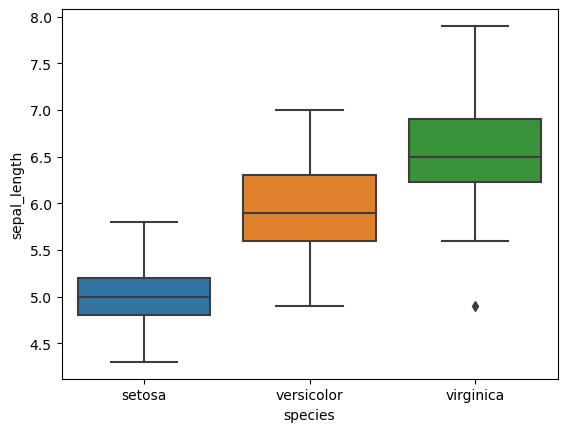

In [83]:
sns.boxplot(x="species", y="sepal_length", data=iris_data);

Returning back to the correlation maxtix, _sepal width_ had an _r_ value of -0.12 with _sepal length_. This was a combined
correlation matix in that all three species were combined so there looks to be a very weak negative correlation between these two variables. 

The _plotly.express_ functationality can be imported to generate an interactive scatter plot with one line for each of the three species. This could be done by filtering out by species with the _pandas_ module, but _px.scatter_ can do this by setting the _color_ argument to 'species'. 

Refer to Plotly.express [Documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter).

In [84]:
fig = px.scatter(iris_data,x='sepal_length',y='sepal_width',trendline='ols',hover_data=iris_data,color='species')
fig.show()

_Iris setosa_ has a moderate positive correlation (_r_ value of 0.74) with _sepal length_ and _sepal width_ and 55.1% (R-squared value of 0.551 for _Iris setoa_) of the variation in _sepal width_ is explained by the variable _sepal length_. Both _Iris virginica_ and _Iris versicolor_ have a smaller correlation coefficient (square root of r-squared) so less of the variation of _sepal width_ is explained by _sepal length_ (_r_ value of 0.52 and 0.45 respectively). This simple linear regression tells us that there are other variables that are important in determining _sepal width_. 

Refer to background reading on [R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/).

In [85]:
results = px.get_trendline_results(fig)

# Iris setosa trendline as setosa is in iloc[0]
print(results.px_fit_results.iloc[0].summary())

# Generating the correlation coefficient from the Rsquared of the Iris setosa model by generating the square root of the 
# Rsquared value 
setosa_rsquared = np.sqrt(results.px_fit_results.iloc[0].rsquared)
print(setosa_rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           6.71e-10
Time:                        19:32:59   Log-Likelihood:                -1.9002
No. Observations:                  50   AIC:                             7.800
Df Residuals:                      48   BIC:                             11.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5694      0.522     -1.091      0.2

In [86]:
# Irisvirginia trendline as virginica is in iloc[1]
print(results.px_fit_results.iloc[1].summary())

# Generating the correlation coefficient from the Rsquared of the Iris virginica model by generating the square root of the 
# Rsquared value 
virginica_rsquared = np.sqrt(results.px_fit_results.iloc[1].rsquared)
print(virginica_rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     18.35
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           8.77e-05
Time:                        19:32:59   Log-Likelihood:                -4.3974
No. Observations:                  50   AIC:                             12.79
Df Residuals:                      48   BIC:                             16.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8721      0.445      1.961      0.0

In [87]:
# Iris versicolor trendline as versicolor is in iloc[2]
print(results.px_fit_results.iloc[2].summary())

# Generating the correlation coefficient from the Rsquared of the Iris versicolor model by generating the square root of the 
# Rsquared value 
versicolor_rsquared = np.sqrt(results.px_fit_results.iloc[2].rsquared)
print(versicolor_rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     12.69
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           0.000843
Time:                        19:32:59   Log-Likelihood:                -7.9955
No. Observations:                  50   AIC:                             19.99
Df Residuals:                      48   BIC:                             23.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4463      0.431      3.357      0.0

Returning to the correlation coefficient of -0.12 returned for _sepal length_ and _sepal width_ earlier, the three individual values of the correlation coefficient (squareroot of R-squared for each species linear model) would not equal -0.12. Using the _trendline_scope_ argument of _px.scatter_ the the species can be combined and the correlation coefficient (or _r_ value returned by the R-squared value of 0.014 is 0.12 (actually 0.117). This has removed the sign and kept an absolute _r value_, but it is still negative as the coefficient of the similar linear regression model is -0.06 (denoted as X1). In this model, only  1.4% (R-squared of 0.014) of the variability of the _sepal width_ is explained by _sepal length_ when all data is combined. 

In [88]:
fig_overall = px.scatter(iris_data,x='sepal_length',y='sepal_width',trendline='ols',
                         hover_data=iris_data,color='species',trendline_scope='overall')
fig_overall.show()

In [89]:
results_overall = px.get_trendline_results(fig_overall)
print(results_overall.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Mon, 08 Apr 2024   Prob (F-statistic):              0.152
Time:                        19:32:59   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4189      0.254     13.484      0.0

In [90]:
iris_overall_rsquared = np.sqrt(results_overall.px_fit_results.iloc[0].rsquared)
print(iris_overall_rsquared)

0.11756978413300224


### End 